**User Profiling and Segmentation**

**Introduction**

User profiling and segmentation are essential techniques in data science that allow organizations to understand their users in depth, identify distinct behavioral patterns, and tailor services, products, and marketing strategies accordingly. By analyzing user data, businesses can improve customer satisfaction, increase engagement, and optimize resource allocation.

**Requirements**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA


**Data Import**

In [ ]:
df = pd.read_csv("user_profiles_for_ads.csv")

In [ ]:
df.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts"
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G..."


**EDA (Exploratory Data Analysis)**

In [ ]:
df.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts"
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G..."


In [ ]:
df.shape

(1000, 16)

In [ ]:
df.tail()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
995,996,18-24,Female,Rural,Spanish,Bachelor,3144,74,Tablet,4.6,5.3,0.097,0.088,154,100k+,"Data Science, Fitness and Wellness, Eco-Friend..."
996,997,55-64,Female,Suburban,Hindi,PhD,9712,458,Mobile Only,4.2,5.6,0.098,0.032,78,100k+,Gardening
997,998,18-24,Male,Rural,Hindi,Technical,5736,218,Mobile + Desktop,2.1,2.4,0.154,0.070,91,100k+,"Investing and Finance, Data Science, Photograp..."
998,999,65+,Male,Urban,English,PhD,2992,260,Mobile + Desktop,4.1,2.7,0.031,0.025,147,60k-80k,"Data Science, Eco-Friendly Living, Gaming, Tra..."
999,1000,35-44,Female,Urban,Hindi,High School,5388,394,Desktop Only,2.1,5.6,0.145,0.076,98,40k-60k,"Data Science, DIY Crafts, Gaming"


In [ ]:
df.isnull().sum()

,0
User ID,0
Age,0
Gender,0
Location,0
Language,0
Education Level,0
Likes and Reactions,0
Followed Accounts,0
Device Usage,0
Time Spent Online (hrs/weekday),0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,1000.0,500.500000,288.819436,1.0,250.750,500.500,750.250,1000.00
Likes and Reactions,1000.0,4997.084000,2838.494365,101.0,2661.250,5002.500,7348.750,9973.00
Followed Accounts,1000.0,251.438000,141.941557,10.0,126.000,245.500,377.000,498.00
Time Spent Online (hrs/weekday),1000.0,2.757500,1.279735,0.5,1.700,2.800,3.800,5.00
Time Spent Online (hrs/weekend),1000.0,4.601600,2.026234,1.0,2.900,4.700,6.400,8.00
Click-Through Rates (CTR),1000.0,0.125333,0.071187,0.0,0.065,0.128,0.186,0.25
Conversion Rates,1000.0,0.049805,0.028670,0.0,0.026,0.049,0.073,0.10
Ad Interaction Time (sec),1000.0,91.425000,51.497965,5.0,45.750,90.000,137.250,179.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User ID                          1000 non-null   int64  
 1   Age                              1000 non-null   object 
 2   Gender                           1000 non-null   object 
 3   Location                         1000 non-null   object 
 4   Language                         1000 non-null   object 
 5   Education Level                  1000 non-null   object 
 6   Likes and Reactions              1000 non-null   int64  
 7   Followed Accounts                1000 non-null   int64  
 8   Device Usage                     1000 non-null   object 
 9   Time Spent Online (hrs/weekday)  1000 non-null   float64
 10  Time Spent Online (hrs/weekend)  1000 non-null   float64
 11  Click-Through Rates (CTR)        1000 non-null   float64
 12  Conversion Rates     

**Data Visualization**

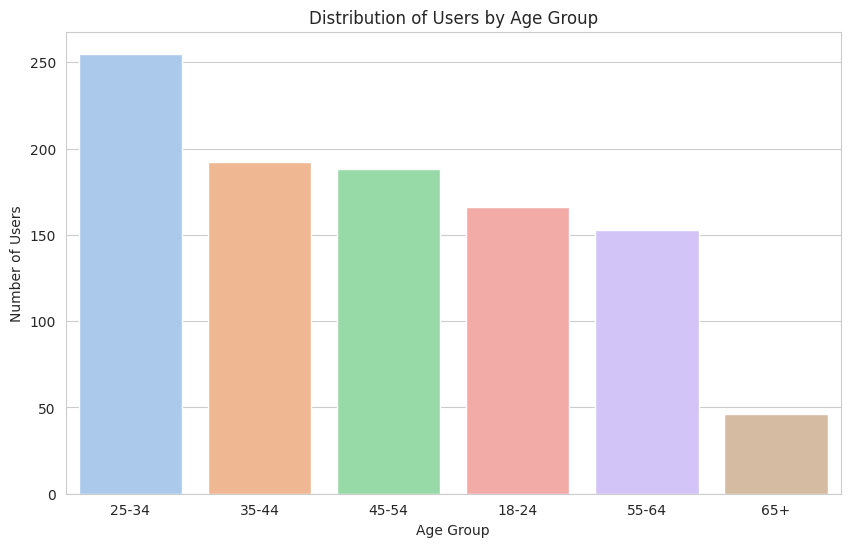

In [ ]:
sns.countplot(x='Age', data=df, palette='pastel', order=df['Age'].value_counts().index)
plt.title("Distribution of Users by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Users")
plt.show()

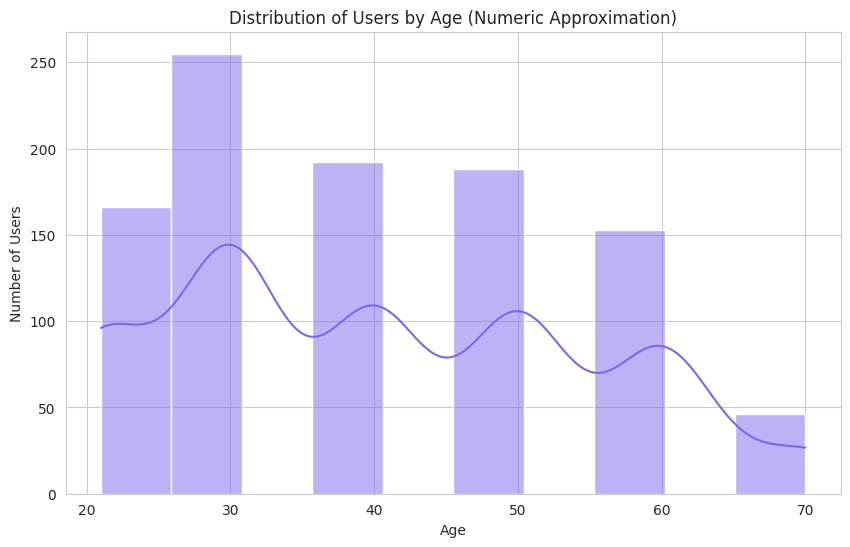

In [ ]:
age_mapping = {
    '18-24': 21,
    '25-34': 30,
    '35-44': 40,
    '45-54': 50,
    '55-64': 60,
    '65+': 70
}

df['Age_numeric'] = df['Age'].map(age_mapping)

sns.histplot(df['Age_numeric'], bins=10, kde=True, color='mediumslateblue')
plt.title("Distribution of Users by Age (Numeric Approximation)")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.show()


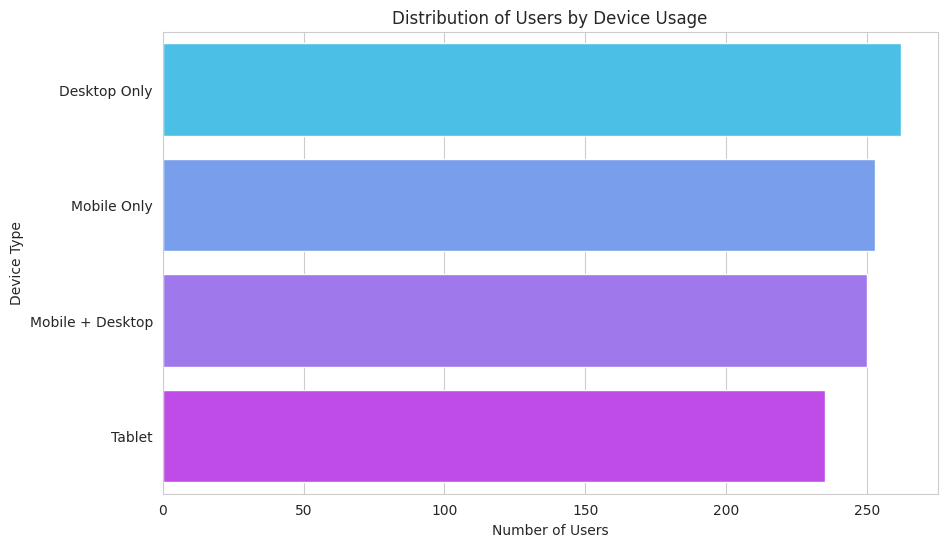

In [ ]:
sns.countplot(y='Device Usage', data=df, palette='cool', order=df['Device Usage'].value_counts().index)
plt.title("Distribution of Users by Device Usage")
plt.xlabel("Number of Users")
plt.ylabel("Device Type")
plt.show()

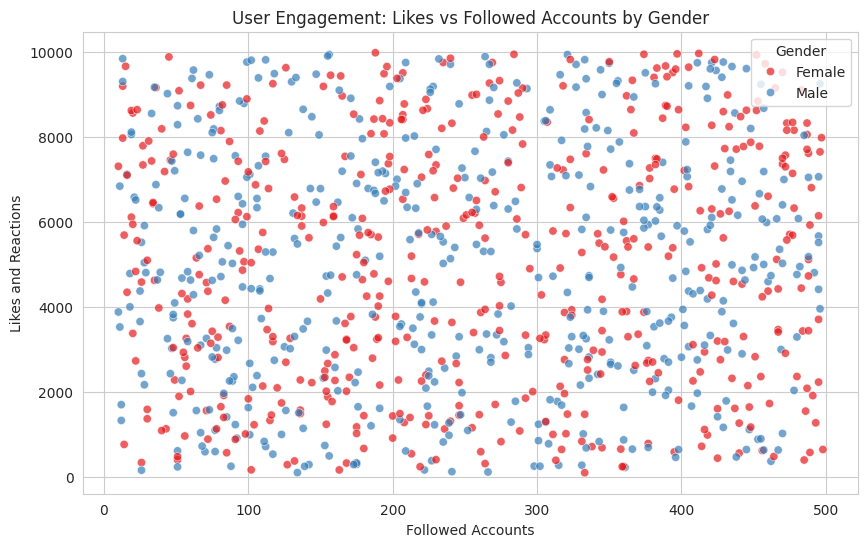

In [ ]:
sns.scatterplot(x='Followed Accounts', y='Likes and Reactions',
                hue='Gender', data=df, palette='Set1', alpha=0.7)
plt.title("User Engagement: Likes vs Followed Accounts by Gender")
plt.xlabel("Followed Accounts")
plt.ylabel("Likes and Reactions")
plt.show()

**Modeling**

In [ ]:
df.columns

Index(['User ID', 'Age', 'Gender', 'Location', 'Language', 'Education Level',
       'Likes and Reactions', 'Followed Accounts', 'Device Usage',
       'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)',
       'Click-Through Rates (CTR)', 'Conversion Rates',
       'Ad Interaction Time (sec)', 'Income Level', 'Top Interests',
       'Age_numeric'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = ['Age_numeric', 'Likes and Reactions', 'Followed Accounts',
                    'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)',
                    'Click-Through Rates (CTR)', 'Conversion Rates', 'Ad Interaction Time (sec)']

categorical_features = ['Gender', 'Device Usage', 'Income Level']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


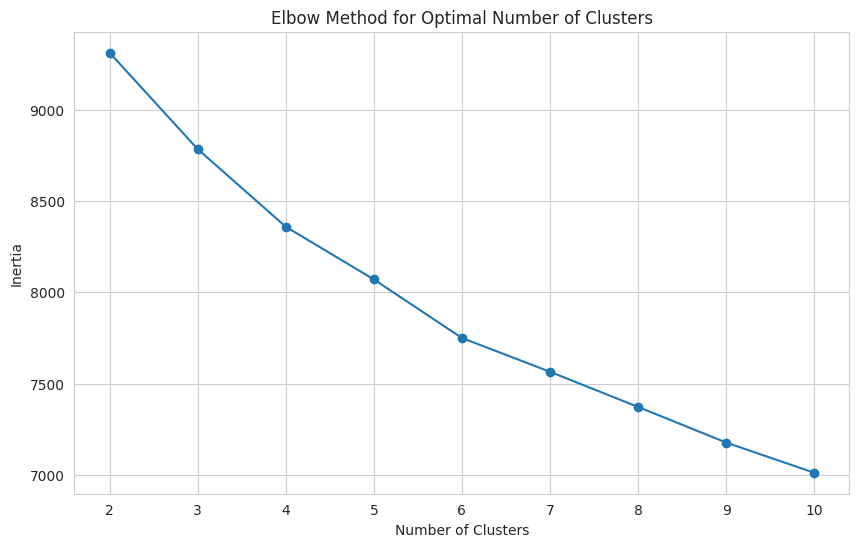

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_scaled = preprocessor.fit_transform(df)

inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2,11), inertia, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

In [ ]:
segment_profile = df.groupby('Segment')[numeric_features].mean().round(2)
segment_profile


,Age_numeric,Likes and Reactions,Followed Accounts,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec)
Segment,,,,,,,,
0,38.83,3650.69,166.35,3.03,4.85,0.19,0.05,117.67
1,42.24,6994.53,341.06,2.80,3.63,0.16,0.05,67.16
2,46.96,4577.79,132.68,2.65,4.28,0.07,0.05,66.85
3,34.61,4609.48,352.39,2.56,5.68,0.08,0.05,114.87


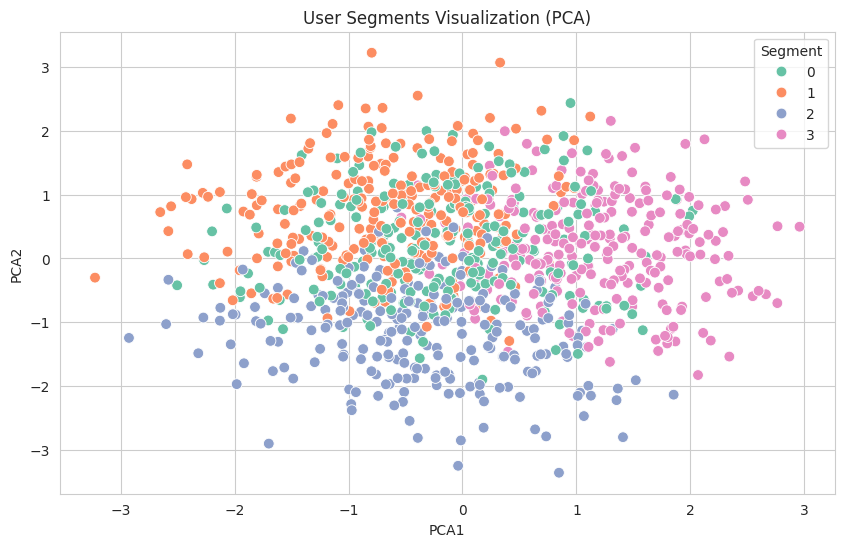

In [ ]:

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PCA1'] = components[:,0]
df['PCA2'] = components[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Segment', data=df, palette='Set2', s=60)
plt.title("User Segments Visualization (PCA)")
plt.show()

In [ ]:
import joblib

joblib.dump(kmeans, "user_segmentation_model.pkl")

joblib.dump(preprocessor, "preprocessor.pkl")


['preprocessor.pkl']

**Conclusion**

In this project, we performed user profiling and segmentation using behavioral and demographic data. By applying K-Means clustering, we identified distinct user segments and analyzed their characteristics through numerical averages and categorical distributions. The insights gained enable targeted strategies for marketing, product recommendations, and personalized user experiences. This workflow, combined with an interactive Streamlit dashboard, allows stakeholders to explore user segments dynamically and make data-driven decisions.